# 第六题(选做)：设计一种改良的优化算法

实验内容：
请你设计一个改进算法，能通过动态调整学习率显著提升收敛速度。
1. 数据集不限
2. 激活函数不限
3. 损失函数不限

要求给出以下内容的总结：
1. 数据集描述
2. 预处理方法及步骤
3. 模型架构：层数，激活函数，损失函数
4. 神经网络超参数：学习率，迭代轮数
5. 训练集和测试集精度
6. 损失值变化曲线
7. 代码注释

数据集描述:tensorflow-mnist
预处理方法及步骤 one-hot
模型架构：层数:3，激活函数:relu，损失函数:cross_entropy
神经网络超参数：学习率:Adagrad 0.3，迭代轮数2000,batch_size:100
训练集和测试集精度: 训练集：0.978 测试集：0.971

In [1]:
#coding = utf-8
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)
mnist=input_data.read_data_sets("data/MNIST_data/",one_hot=True)
#sess=tf.InteractiveSession()

in_units=784#输入节点数
h1_units=100#隐含层输出节点数
W1=tf.Variable(tf.truncated_normal([in_units,h1_units],stddev=0.1))#隐含层的权重，初始化为截断的正态分布，其标准差为0.1
b1=tf.Variable(tf.zeros([h1_units]))#隐含层的偏置
W2=tf.Variable(tf.zeros([h1_units,10]))#输出层权重
b2=tf.Variable(tf.zeros([10]))#输出层的偏置


#定义输入x的placeholder
x=tf.placeholder(tf.float32,[None,in_units])
keep_prob=tf.placeholder(tf.float32)#dropout的比率

#定义一个激活函数为ReLU的隐含层hidden1
hidden1=tf.nn.relu(tf.matmul(x,W1)+b1)

#实现dropout功能，即随机将一部分节点置为0.其中keep_prob即为保留数据而不置为0的比例
hidden1_drop=tf.nn.dropout(hidden1,keep_prob)
y=tf.nn.softmax(tf.matmul(hidden1_drop,W2)+b2)

#定义损失函数
y_=tf.placeholder(tf.float32,[None,10])
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))#交叉熵

#选择自适应优化器Adagrad，把学习速率设为变量0.3
train_step=tf.train.AdagradOptimizer(0.3).minimize(cross_entropy)

#tf.global_variables_initializer().run()
train_loss_list = []
test_loss_list = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        batch_xs,batch_ys=mnist.train.next_batch(100)#采用3000个batch,每个batch包含100条样本
        sess.run(train_step,{x:batch_xs,y_:batch_ys,keep_prob:0.75})
        loss = sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 1.})
        losstest = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.})
        train_loss_list.append(loss)
        test_loss_list.append(losstest)
    #对模型准确率进行评测
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accurancy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print("训练集精度：",accurancy.eval({x:mnist.train.images,y_:mnist.train.labels,keep_prob:1.0}))
    print("测试集精度：",accurancy.eval({x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0}))#因为是预测部分，所以令keep_prob=1


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
训练集精度： 0.97785455
测试集精度： 0.9717


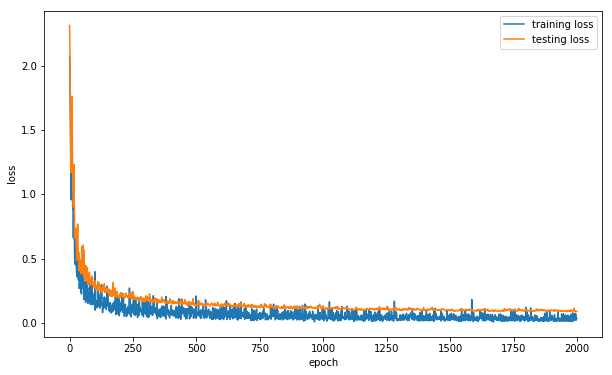

In [2]:

def plot_loss_curve(training_loss_list, testing_loss_list):
    '''
    绘制损失值变化曲线

    Parameters
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值

    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值

    '''
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_list, label='training loss')
    plt.plot(testing_loss_list, label='testing loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
plot_loss_curve(train_loss_list, test_loss_list)